In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data = {
    'Dataset': ['MNIST', 'CIFAR-10', 'CIFAR-100'],
    'CNN-Basic': [98.90, 72.96, 42.51],
    'ViT-Basic': [97.71, 35.14, 10.21],
    'ViT-DINO': [97.51,  35.89, 7.75],
}


df = pd.DataFrame(data)

In [20]:
df

,Dataset,CNN-Basic,ViT-Basic,ViT-DINO
0,MNIST,98.90,97.71,97.51
1,CIFAR-10,72.96,35.14,35.89
2,CIFAR-100,42.51,10.21,7.75


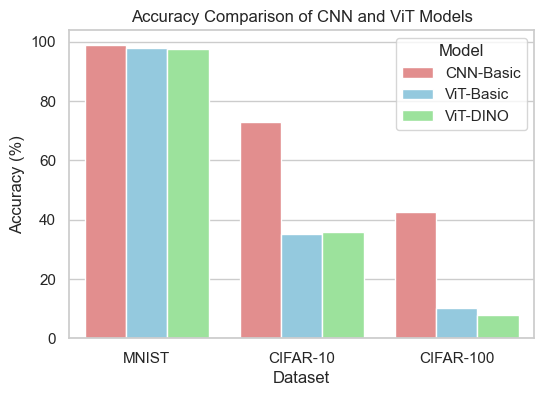

In [21]:
# Melt the DataFrame to stack ViT and CNN accuracies next to each other
df_melted = df.melt(id_vars=['Dataset'], var_name='Model', value_name='Accuracy')

# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Dataset', y='Accuracy', hue='Model', data=df_melted, palette={"CNN-Basic": "lightcoral", "ViT-Basic": "skyblue", "ViT-DINO": "lightgreen"})

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of CNN and ViT Models')

# Add a legend
plt.legend(title='Model', loc='upper right')

# Save the plot
plt.savefig("../notebooks/plots/full_accuracy_plots.pdf", format="pdf")

# Plot the decreasing dataset effect on accuracy

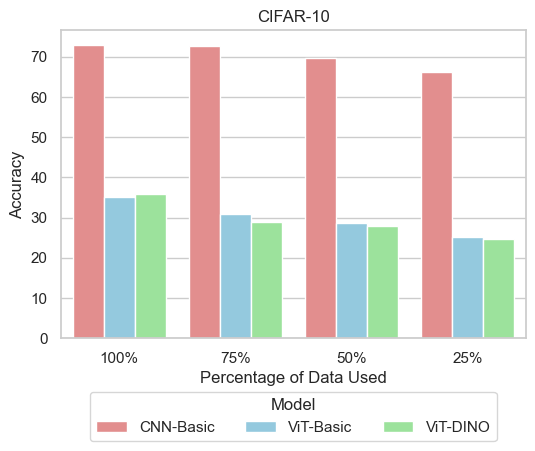

In [6]:
# Create the dataframes
df_100_percent = {
    'Dataset': ['MNIST', 'CIFAR-10', 'CIFAR-100'],
    'CNN-Basic': [98.90, 72.96, 42.51],
    'ViT-Basic': [97.71, 35.14, 10.21],
    'ViT-DINO': [97.51,  35.89, 7.75],
}

df_25_percent = {
    'Dataset': ['MNIST', 'CIFAR-10', 'CIFAR-100'],
    'CNN-Basic': [98.72, 66.16, 30.00],
    'ViT-Basic': [96.16, 25.28, 3.48],
    'ViT-DINO': [94.12,  24.72, 3.44],
}

df_50_percent = {
    'Dataset': ['MNIST', 'CIFAR-10', 'CIFAR-100'],
    'CNN-Basic': [98.88, 69.64, 34.90],
    'ViT-Basic': [96.72, 28.64, 5.54],
    'ViT-DINO': [96.58, 27.94, 4.44],
}

df_75_percent = {
    'Dataset': ['MNIST', 'CIFAR-10', 'CIFAR-100'],
    'CNN-Basic': [99.19, 72.64, 39.71],
    'ViT-Basic': [97.40, 31.04, 7.47],
    'ViT-DINO': [96.53, 29.05, 5.76],
}


# Convert each dictionary to DataFrame
df_100 = pd.DataFrame(df_100_percent)
df_75 = pd.DataFrame(df_75_percent)
df_50 = pd.DataFrame(df_50_percent)
df_25 = pd.DataFrame(df_25_percent)

# Add a 'Percentage of Data Used' column
df_100['Percentage of Data Used'] = '100%'
df_75['Percentage of Data Used'] = '75%'
df_50['Percentage of Data Used'] = '50%'
df_25['Percentage of Data Used'] = '25%'

# Combine all these dataframes into one
df_combined = pd.concat([df_100, df_75, df_50, df_25])

# Melt the DataFrame to long format for easier plotting with seaborn
df_melted = df_combined.melt(id_vars=['Dataset', 'Percentage of Data Used'], value_vars=['CNN-Basic', 'ViT-Basic', 'ViT-DINO'], var_name='Model', value_name='Accuracy')

# Set the style of the plot
sns.set(style="whitegrid")

# Filter data for CIFAR-10
df_cifar10 = df_melted[df_melted['Dataset'] == 'CIFAR-10']

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='Percentage of Data Used', y='Accuracy', hue='Model', data=df_cifar10, palette={"CNN-Basic": "lightcoral", "ViT-Basic": "skyblue", "ViT-DINO": "lightgreen"})
plt.title('CIFAR-10')
# Position the legend at the bottom
plt.legend(title='Model', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()



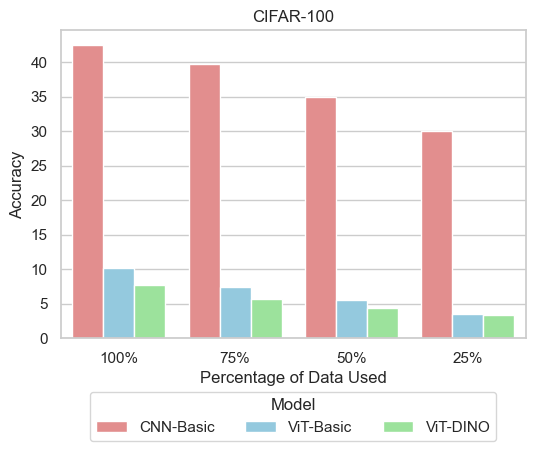

In [7]:
# Filter data for CIFAR-100
df_cifar10 = df_melted[df_melted['Dataset'] == 'CIFAR-100']

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='Percentage of Data Used', y='Accuracy', hue='Model', data=df_cifar10, palette={"CNN-Basic": "lightcoral", "ViT-Basic": "skyblue", "ViT-DINO": "lightgreen"})
plt.title('CIFAR-100')
# Position the legend at the bottom
plt.legend(title='Model', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()


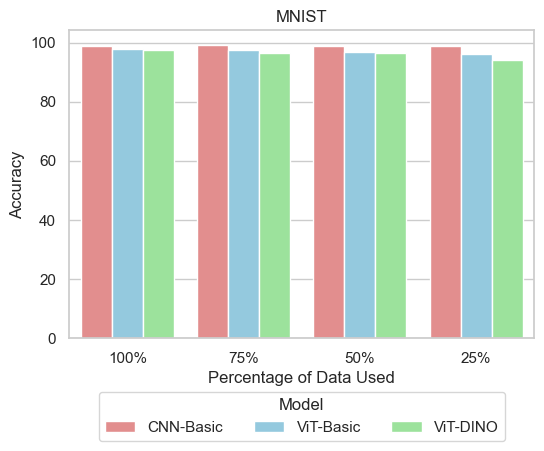

In [8]:
# Filter data for MNIST
df_cifar10 = df_melted[df_melted['Dataset'] == 'MNIST']

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='Percentage of Data Used', y='Accuracy', hue='Model', data=df_cifar10, palette={"CNN-Basic": "lightcoral", "ViT-Basic": "skyblue", "ViT-DINO": "lightgreen"})
plt.title('MNIST')
# Position the legend at the bottom
plt.legend(title='Model', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()


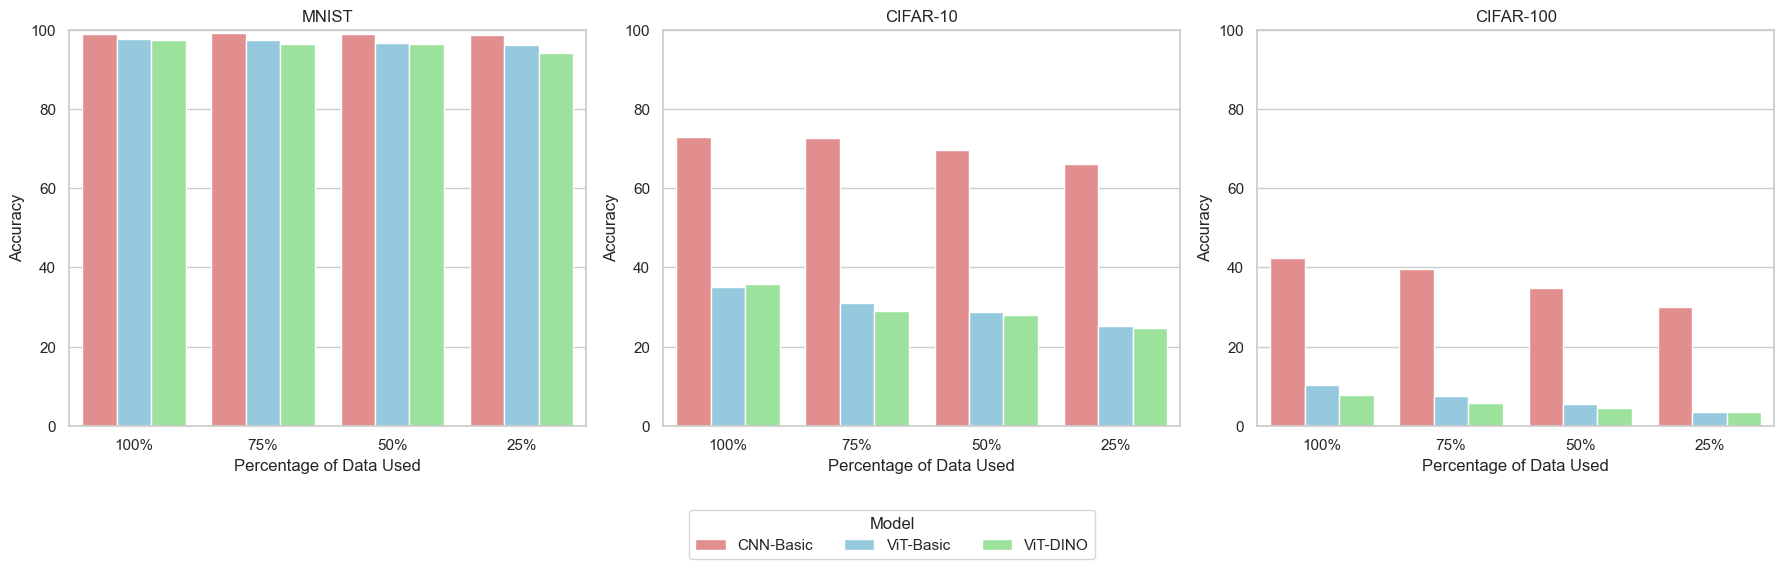

In [11]:
# Create a 1x3 grid of plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

datasets = ['MNIST', 'CIFAR-10', 'CIFAR-100']
titles = ['MNIST', 'CIFAR-10', 'CIFAR-100']
colors = {"CNN-Basic": "lightcoral", "ViT-Basic": "skyblue", "ViT-DINO": "lightgreen"}

for ax, dataset, title in zip(axes, datasets, titles):
    # Filter the data for the current dataset
    df_filtered = df_melted[df_melted['Dataset'] == dataset]
    
    # Plot the data on the current subplot
    sns.barplot(x='Percentage of Data Used', y='Accuracy', hue='Model', data=df_filtered, palette=colors, ax=ax)
    ax.set_title(title)
    
    
    # Remove the individual legend for each subplot
    ax.get_legend().remove()
    # fix the y-axis limits
    ax.set_ylim([0, 100])

# Add a shared legend to the bottom of the figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, title='Model', loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.15))

plt.tight_layout()

# Save the plot
plt.savefig("../notebooks/plots/decreasing_accuracy_plots.pdf", format="pdf") # doesn't save with the legend for some reason???
plt.show()
